### 1 - Packages ###
Let's first import all the packages that you will need during this assignment.

numpy is the fundamental package for scientific computing with Python.
sklearn provides simple and efficient tools for data mining and data analysis.
matplotlib is a library for plotting graphs in Python.
testCases provides some test examples to assess the correctness of your functions
planar_utils provide various useful functions used in this assignment

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(42)

### 2 - Load dataset ###

In [405]:
X, y = load_planar_dataset()

array([[ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,
         3.49178475e-01,  6.94150378e-01,  1.62065038e+00,
         1.53856225e+00,  3.63085641e-02,  4.74591109e-01,
         1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
         2.61695163e-01,  2.31614896e-01,  1.58013020e+00,
         6.35509950e-03,  6.80610419e-01,  1.21400432e-01,
         1.13281261e+00,  1.61505892e+00,  1.66454441e-01,
         1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
         1.54661332e+00,  9.84590400e-01,  1.45313345e+00,
         7.49043388e-01,  1.45048341e+00,  1.64287865e+00,
         1.28141487e+00,  1.59574104e+00,  1.46298294e+00,
         1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
         1.22995404e+00,  1.31142345e+00, -1.99364553e+00,
         3.94564752e-01,  1.51715449e+00,  1.69169139e+00,
         1.74186686e+00, -2.91373382e+00,  7.52150898e-01,
         1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
         3.52484080e-01, -1.48694206e+00, -7.45290416e-0

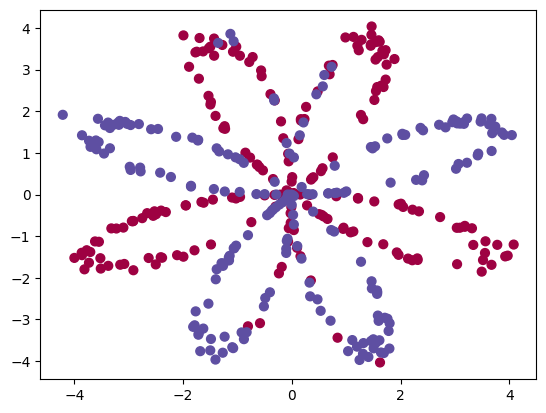

In [373]:
# Visualize dataset
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral, s=40)

### Test with simple logistic regression

In [374]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, y.T)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

#### Plot decision boundary for logistic regression

Text(0.5, 1.0, 'Logistic Regression')

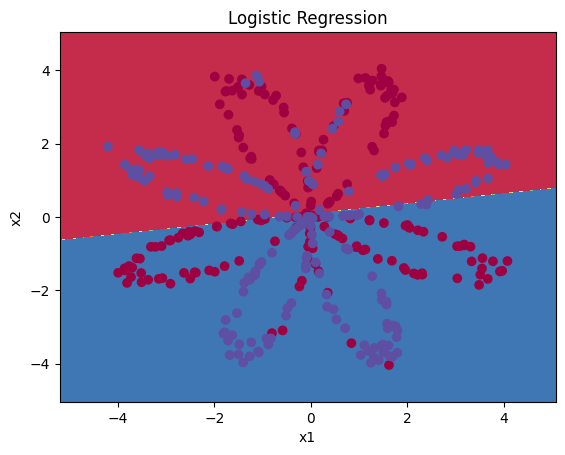

In [375]:
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")

#### Calculate model accuracy

In [376]:
LR_predictions = clf.predict(X.T)

print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/2116761697.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/float(y.size)*100) +


<b>Conclusion: </b> The dataset is not linearly separable, so logistic regression doesn't perform well. 

### Train a one-layer Neural Network

<img src="https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/08f1947ca9341d69fe013d1462813c4c07a1b169/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%203/Planar%20data%20classification%20with%20one%20hidden%20layer/images/classification_kiank.png"/>

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

In [377]:
def metrics(y, predictions, n_h):
    print(f"Precision for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(1 - y, predictions.T)) * 100)} %")
    print(f"Recall for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(y, 1 - predictions.T)) * 100)} %")
    print(f"Accuracy for n_h={n_h}: {float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100)} %")

In [378]:
def input_output_layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y

In [379]:
def randomly_initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.rand(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.rand(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

In [404]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return cache

n_x, n_y = input_output_layer_sizes(X, y)
n_h = 4

import time

et = time.time()
forward_propagation(X, randomly_initialize_parameters(n_x, n_h, n_y))
it = time.time()
it-et

0.0002777576446533203

In [381]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    loss = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
    cost =  - (1 / m) * np.sum(loss) 
    cost = float(np.squeeze(cost))
    return cost

In [382]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    return grads

In [383]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

In [406]:
import time

def nn_model(X, Y, n_h, num_iterations=10000, learning_rate=1.2, print_cost=False):
    np.random.seed(42)
    n_x, n_y = input_output_layer_sizes(X, Y)
    parameters = randomly_initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        cache = forward_propagation(X, parameters)
        cost = compute_cost(cache["A2"], Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [407]:
def predict(parameters, X, decision_rate=0.5):
    cache = forward_propagation(X, parameters)
    return cache["A2"] > decision_rate

In [409]:
n_h = 20
parameters = nn_model(X, y, n_h, print_cost=True, num_iterations=100000)

Cost after iteration 0: 0.693231
Cost after iteration 100: 0.466270
Cost after iteration 200: 0.332460
Cost after iteration 300: 0.314587
Cost after iteration 400: 0.304261
Cost after iteration 500: 0.296649
Cost after iteration 600: 0.291158
Cost after iteration 700: 0.287026
Cost after iteration 800: 0.283631
Cost after iteration 900: 0.280694
Cost after iteration 1000: 0.278085
Cost after iteration 1100: 0.275732
Cost after iteration 1200: 0.273591
Cost after iteration 1300: 0.271630
Cost after iteration 1400: 0.269815
Cost after iteration 1500: 0.268104
Cost after iteration 1600: 0.266351
Cost after iteration 1700: 0.263497
Cost after iteration 1800: 0.253190
Cost after iteration 1900: 0.236782
Cost after iteration 2000: 0.225504
Cost after iteration 2100: 0.215854
Cost after iteration 2200: 0.209738
Cost after iteration 2300: 0.205315
Cost after iteration 2400: 0.201612
Cost after iteration 2500: 0.198397
Cost after iteration 2600: 0.195588
Cost after iteration 2700: 0.193129
Cost

/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/1432822037.py:3: RuntimeWarning: divide by zero encountered in log
  loss = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/1432822037.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)


Cost after iteration 67900: nan
Cost after iteration 68000: nan
Cost after iteration 68100: nan
Cost after iteration 68200: nan
Cost after iteration 68300: nan
Cost after iteration 68400: nan
Cost after iteration 68500: nan
Cost after iteration 68600: nan
Cost after iteration 68700: nan
Cost after iteration 68800: nan
Cost after iteration 68900: nan
Cost after iteration 69000: nan
Cost after iteration 69100: nan
Cost after iteration 69200: nan
Cost after iteration 69300: nan
Cost after iteration 69400: nan
Cost after iteration 69500: nan
Cost after iteration 69600: nan
Cost after iteration 69700: nan
Cost after iteration 69800: nan
Cost after iteration 69900: nan
Cost after iteration 70000: nan
Cost after iteration 70100: nan
Cost after iteration 70200: nan
Cost after iteration 70300: nan
Cost after iteration 70400: nan
Cost after iteration 70500: nan
Cost after iteration 70600: nan
Cost after iteration 70700: nan
Cost after iteration 70800: nan
Cost after iteration 70900: nan
Cost aft

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

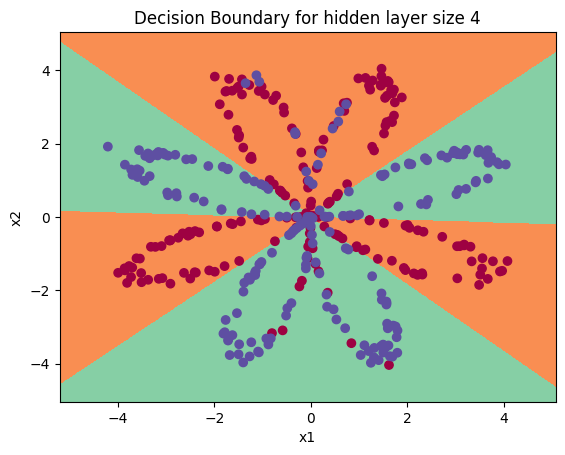

In [387]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))

In [388]:
#Print accuracy, precision
predictions = predict(parameters, X)
metrics(y, predictions, n_h)

Precision for n_h=4: 91.83673469387756 %
Recall for n_h=4: 90.0 %
Accuracy for n_h=4: 91.0 %


/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Precision for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(1 - y, predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Recall for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(y, 1 - predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:4: DeprecationWarning: Conversion of an 

/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Precision for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(1 - y, predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Recall for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(y, 1 - predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:4: DeprecationWarning: Conversion of an 

Precision for n_h=1: 67.5 %
Recall for n_h=1: 67.5 %
Accuracy for n_h=1: 67.5 %
Precision for n_h=2: 67.51269035532995 %
Recall for n_h=2: 66.5 %
Accuracy for n_h=2: 67.25 %
Precision for n_h=3: 90.54726368159204 %
Recall for n_h=3: 91.0 %
Accuracy for n_h=3: 90.75 %
Precision for n_h=4: 90.54726368159204 %
Recall for n_h=4: 91.0 %
Accuracy for n_h=4: 90.75 %
Precision for n_h=5: 90.64039408866995 %
Recall for n_h=5: 92.0 %
Accuracy for n_h=5: 91.25 %
Precision for n_h=10: 94.5054945054945 %
Recall for n_h=10: 86.0 %
Accuracy for n_h=10: 90.5 %
Precision for n_h=20: 91.4572864321608 %
Recall for n_h=20: 91.0 %
Accuracy for n_h=20: 91.25 %
Precision for n_h=50: 94.97206703910615 %
Recall for n_h=50: 85.0 %
Accuracy for n_h=50: 90.25 %


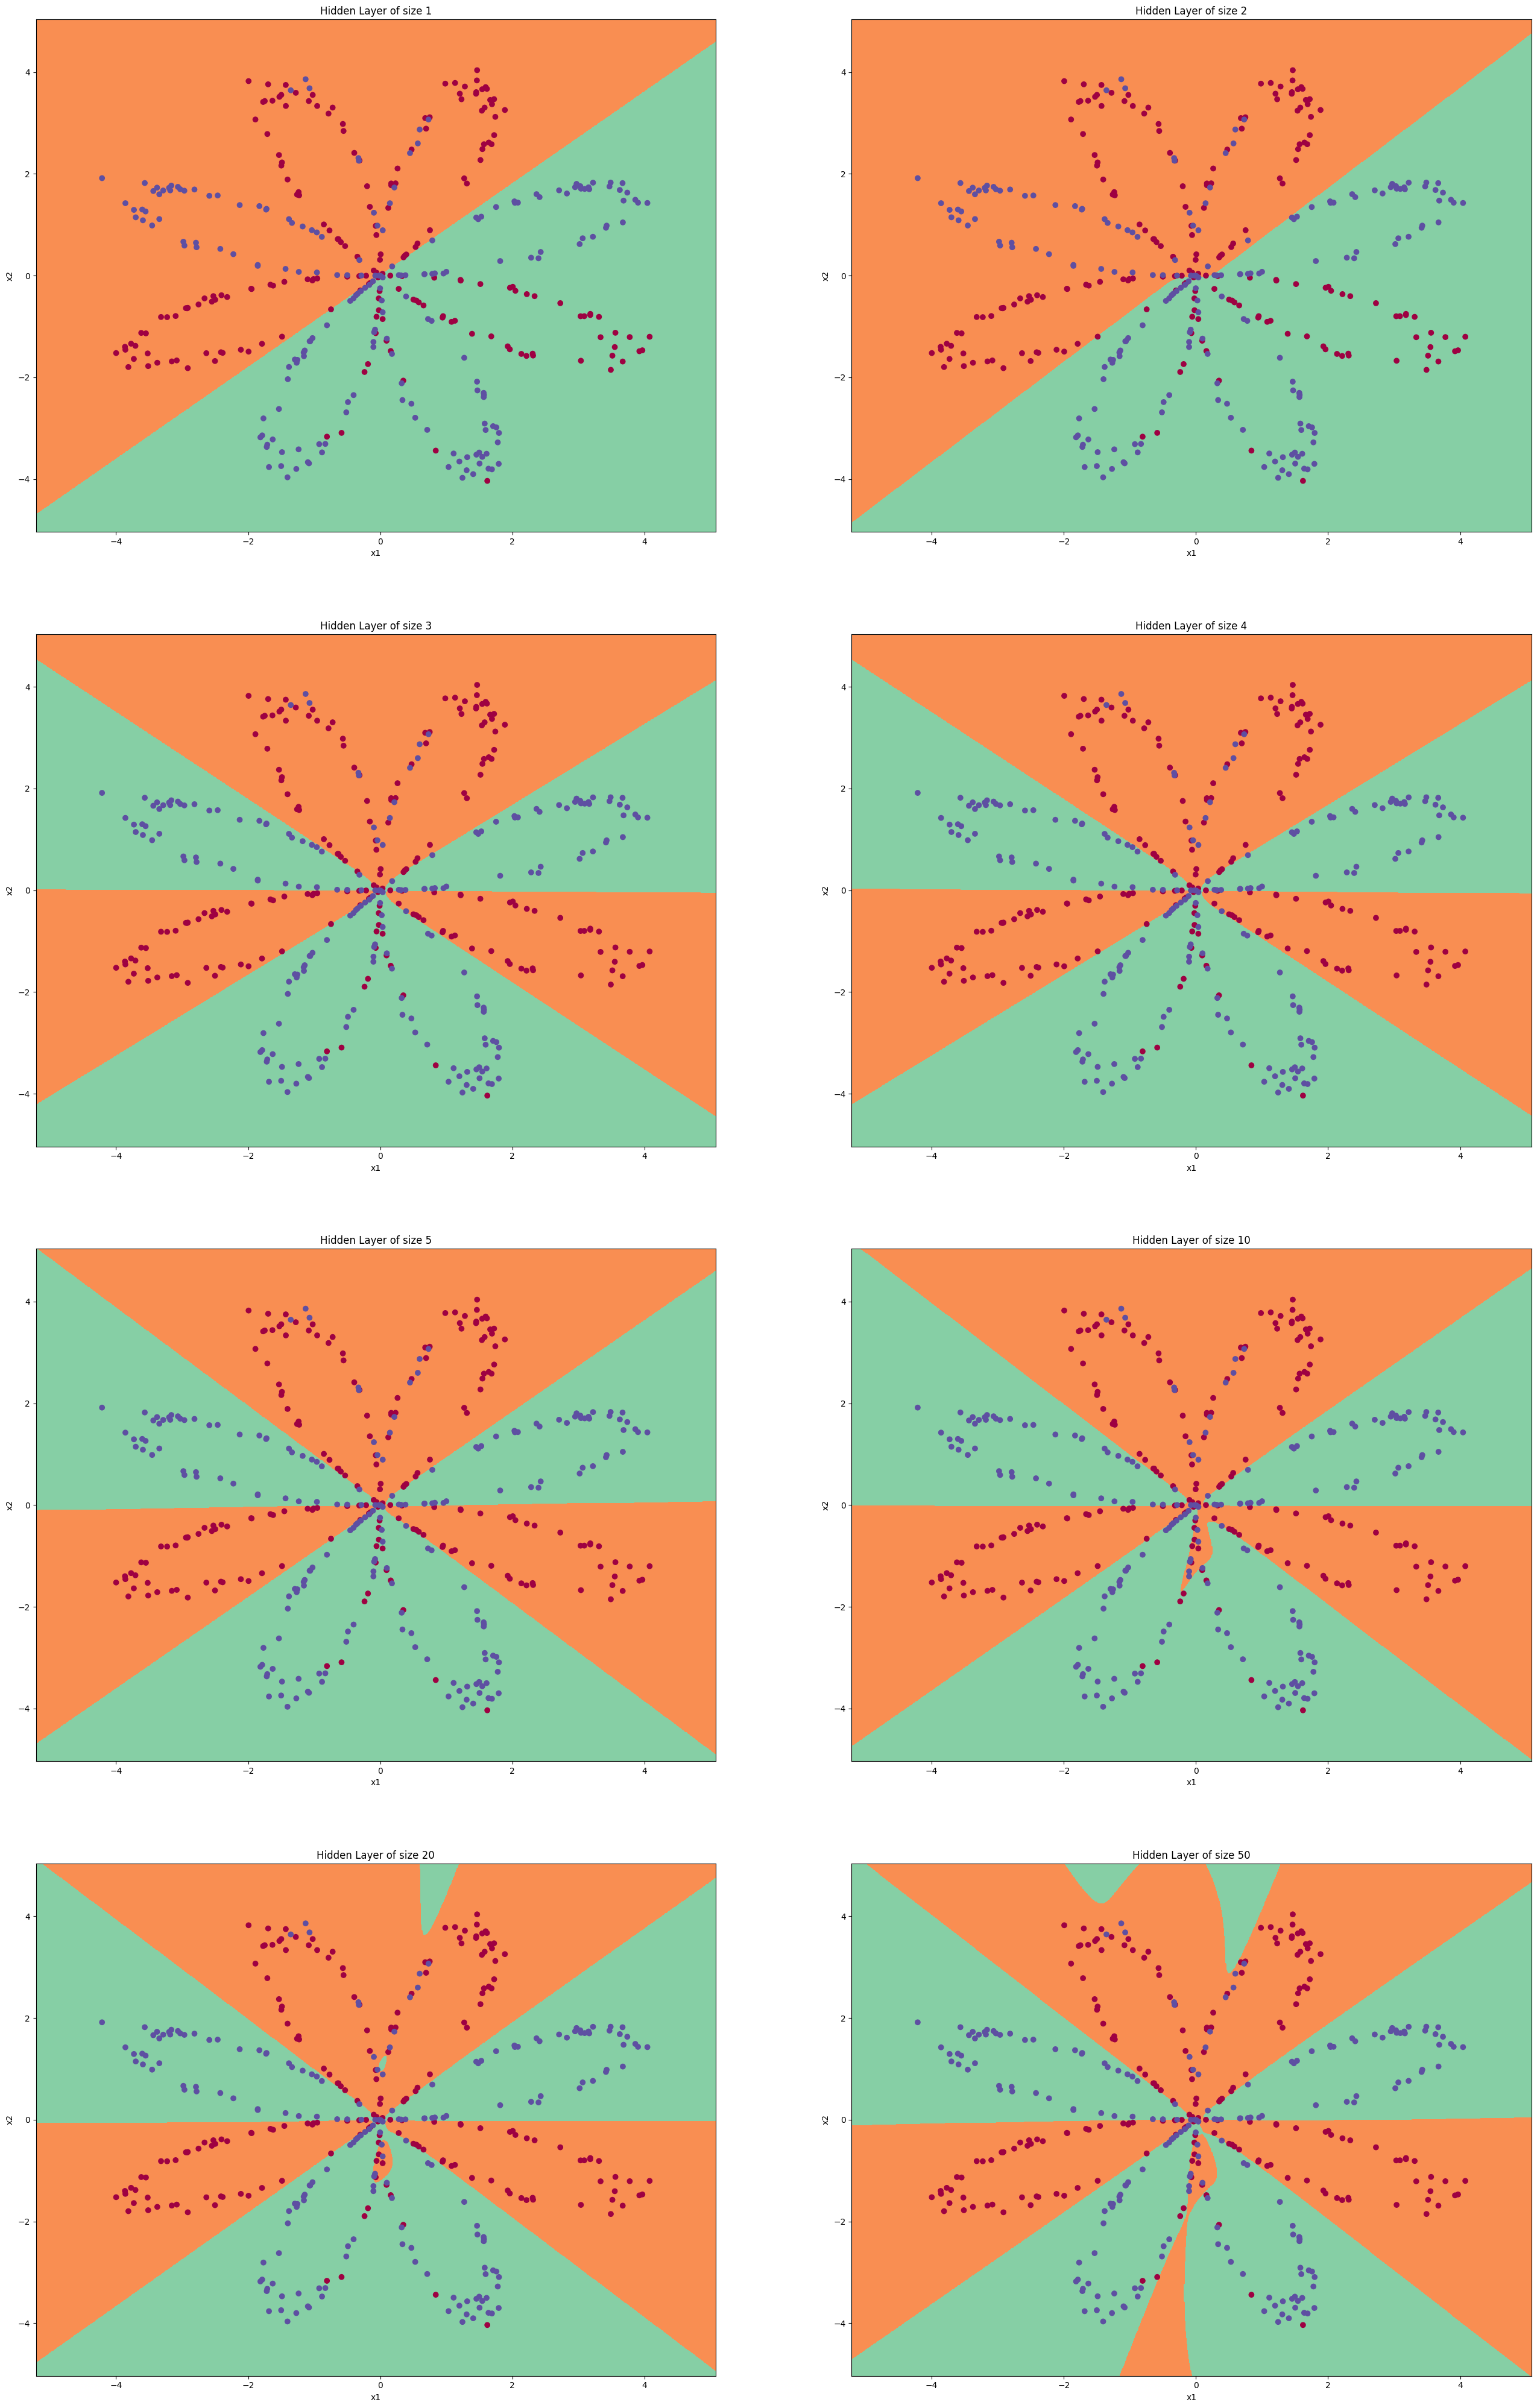

In [389]:
plt.figure(figsize=(32, 64))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
    predictions = predict(parameters, X)
    metrics(y, predictions, n_h)

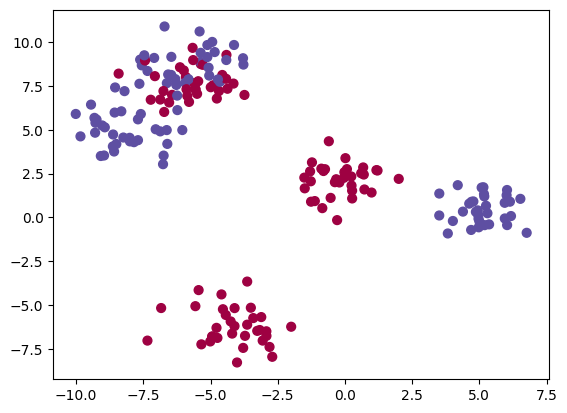

In [390]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "blobs"

X, y = datasets[dataset]

# make blobs binary
if dataset == "blobs":
    y = y%2

# Visualize the data
plt.scatter(X.T[0, :], X.T[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [391]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.6)

X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.reshape(1, y_train.shape[0]), y_test.reshape(1, y_test.shape[0])

In [392]:
n_h = 10
parameters = nn_model(X_train, y_train, n_h, num_iterations=50000, print_cost=True)

Cost after iteration 0: 0.693011
Cost after iteration 100: 0.295664
Cost after iteration 200: 0.251477
Cost after iteration 300: 0.301701
Cost after iteration 400: 0.244167
Cost after iteration 500: 0.254967
Cost after iteration 600: 0.255946
Cost after iteration 700: 0.255345
Cost after iteration 800: 0.240504
Cost after iteration 900: 0.247035
Cost after iteration 1000: 0.250792
Cost after iteration 1100: 0.239707
Cost after iteration 1200: 0.251636
Cost after iteration 1300: 0.244577
Cost after iteration 1400: 0.236283
Cost after iteration 1500: 0.249271
Cost after iteration 1600: 0.246212
Cost after iteration 1700: 0.236682
Cost after iteration 1800: 0.240559
Cost after iteration 1900: 0.236298
Cost after iteration 2000: 0.233534
Cost after iteration 2100: 0.241894
Cost after iteration 2200: 0.315535
Cost after iteration 2300: 0.238448
Cost after iteration 2400: 0.239865
Cost after iteration 2500: 0.238916
Cost after iteration 2600: 0.237657
Cost after iteration 2700: 0.238496
Cost

Text(0.5, 1.0, 'Training Decision Boundary for hidden layer size 10')

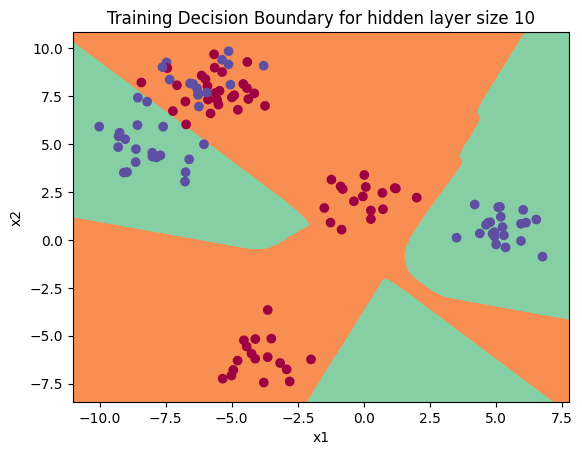

In [393]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, y_train)
plt.title("Training Decision Boundary for hidden layer size " + str(n_h))

Text(0.5, 1.0, 'Testing Decision Boundary for hidden layer size 10')

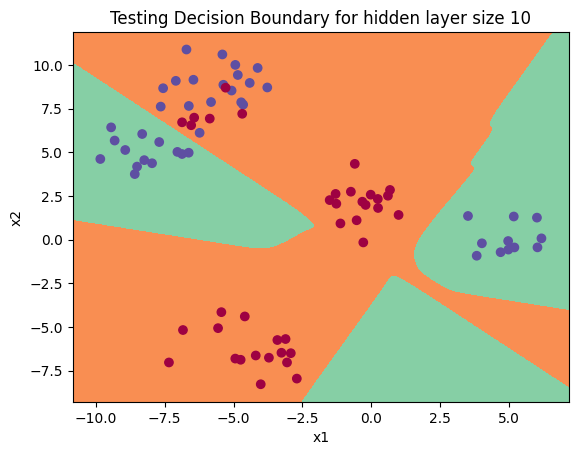

In [394]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, y_test)
plt.title("Testing Decision Boundary for hidden layer size " + str(n_h))

In [395]:
# Print accuracy
training_predictions = predict(parameters, X_train)
metrics(y_train, training_predictions, n_h)

Precision for n_h=10: 100.0 %
Recall for n_h=10: 74.13793103448276 %
Accuracy for n_h=10: 87.5 %


/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Precision for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(1 - y, predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Recall for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(y, 1 - predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:4: DeprecationWarning: Conversion of an 

In [396]:
# Print accuracy
test_predictions = predict(parameters, X_test)
metrics(y_test, test_predictions, n_h)

Precision for n_h=10: 100.0 %
Recall for n_h=10: 57.14285714285714 %
Accuracy for n_h=10: 77.5 %


/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Precision for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(1 - y, predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Recall for n_h={n_h}: {float((np.dot(y, predictions.T))/(np.dot(y, predictions.T) + np.dot(y, 1 - predictions.T)) * 100)} %")
/var/folders/kc/t8t7n3dj1795y1b1_s3_g0rm0000gn/T/ipykernel_45896/3838965716.py:4: DeprecationWarning: Conversion of an 